In [1]:
# Import packages
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [2]:
# Load tortoise data
tortoise = pd.read_csv("Tortoises.csv")

In [3]:
# Store relevant columns as variables
X = tortoise["Length"]
y = tortoise["Clutch"]

In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

In [5]:
# Create a linear model using the training set and predictions using the test set
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
linModel = LinearRegression()
linModel.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
y_pred = np.ravel(linModel.predict(X_test.reshape(-1, 1)))

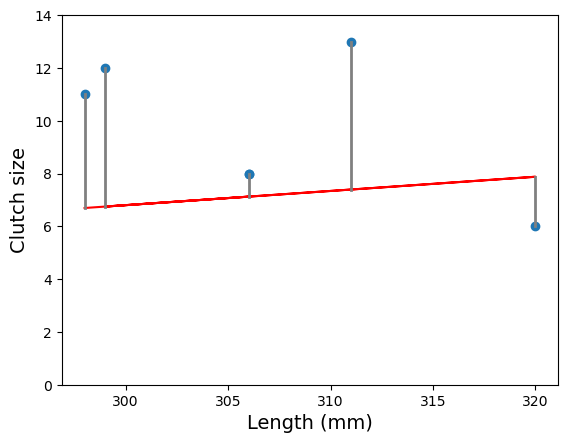

In [6]:
# Display linear model and scatter plot of the test set
plt.scatter(X_test, y_test)
plt.xlabel("Length (mm)", fontsize=14)
plt.ylabel("Clutch size", fontsize=14)
plt.plot(X_test, y_pred, color='red')
plt.ylim([0, 14])
for i in range(5):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], color='grey', linewidth=2)

In [7]:
# Display MSE
metrics.mean_squared_error(y_test, y_pred)

13.769920706476404

In [8]:
# Display RMSE
metrics.mean_squared_error(y_test, y_pred, squared=False)

3.710784378871454

In [9]:
# Display MAE
metrics.mean_absolute_error(y_test, y_pred)

3.1322645290581157

In [10]:
# Create a quadratic model using the training set and predictions using the test set
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
poly = PolynomialFeatures().fit_transform(X_train.reshape(-1, 1))
poly_reg_model = LinearRegression().fit(poly, y_train)
poly_test = PolynomialFeatures().fit_transform(X_test.reshape(-1, 1))
y_pred = poly_reg_model.predict(poly_test)

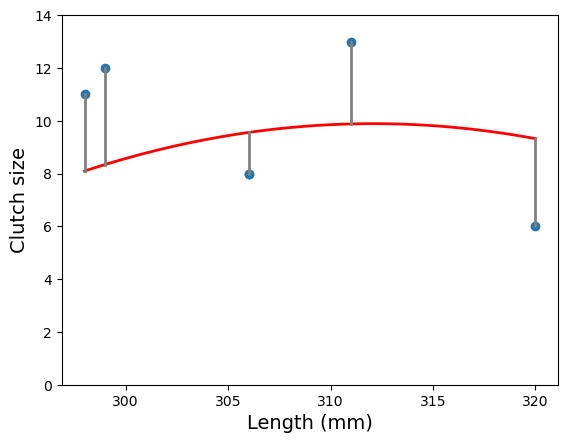

In [11]:
# Display quadratic model and scatter plot of the test set
plt.scatter(X_test, y_test)
plt.xlabel("Length (mm)", fontsize=14)
plt.ylabel("Clutch size", fontsize=14)
x = np.linspace(X_test.min(), X_test.max(), 100)
y = (
    poly_reg_model.coef_[2] * x**2
    + poly_reg_model.coef_[1] * x
    + poly_reg_model.intercept_
)
plt.plot(x, y, color='red', linewidth=2)
plt.ylim([0, 14])
for i in range(5):
    plt.plot([X_test[i], X_test[i]], [y_test[i], y_pred[i]], color='grey', linewidth=2)

In [12]:
# Display MSE
metrics.mean_squared_error(y_test, y_pred)

7.9059569185765755

In [13]:
# Display RMSE
metrics.mean_squared_error(y_test, y_pred, squared=False)

2.811753353083548

In [14]:
# Display MAE
metrics.mean_absolute_error(y_test, y_pred)

2.6860332375250664